In [1]:
!pip install lazypredict
!pip install dask[dataframe]

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")
import lightgbm as lgb
import os
import sys
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
from datetime import datetime
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import lazypredict
# Redirect LightGBM logging to null
#sys.stdout = open(os.devnull, 'w')
#sys.stderr = open(os.devnull, 'w')

# Your LightGBM code here

# Restore stdout and stderr
#sys.stdout = sys.__stdout__
#sys.stderr = sys.__stderr__
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor,LazyClassifier
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('/kaggle/input/data_file.csv')
df.sample(10)

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
17844,msxml3r (4).dll,359f4536f36a624f9179376135656d5b,34404,56,4096,10,10,0,0,0,14,10,2,262144,352,1256,0,1
39226,VirusShare_dfdeca5b074b2b969c79fc51236a2eb0,dfdeca5b074b2b969c79fc51236a2eb0,332,28,4688,5,5,0,0,4096,6,20,4,262144,34816,1648,0,0
14235,AdHocReportingExcelClient (35).dll,3354754887255ef39f4d2bd72eb33906,332,84,247728,6,6,282528,203,221184,12,10,5,262144,320,434812,0,1
21054,cnvfat (5).dll,cbd285ee5e907d21e592c59e06711508,332,28,4816,6,6,37184,103,4096,9,0,4,262144,320,1048,0,1
9804,Microsoft.Build.Utilities.Core.resources.ni (1...,87d8df6aaa21b476b8ac039259bb3173,332,28,31572,0,5,0,0,0,11,0,3,0,34112,1260,0,1
30681,VirusShare_7e0cb4bd984809a8ab345f147c2d07ea,7e0cb4bd984809a8ab345f147c2d07ea,332,0,0,0,1,540672,140,0,1,3,10,1048576,0,0,0,0
23808,tscon (2).exe,2bbb051a0d93592d8067bc039ec97b80,34404,28,4816,6,6,0,0,4096,9,0,5,524288,33088,2056,0,1
17308,KBDHELA2 (3).DLL,a0efcf908fdf04eae718459874269ba6,34404,84,12064,10,10,11968,84,0,14,10,4,262144,16736,1056,0,1
34587,VirusShare_6305be763ade006a57db94adcf970416,6305be763ade006a57db94adcf970416,332,0,0,0,5,0,0,4096,9,0,6,1048576,0,2096,0,0
6159,tpmcompc (6).dll,3345b750c049654803760acdd16d9424,34404,28,4512,6,6,11072,106,4096,9,0,5,262144,320,32368,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [5]:
df.drop(['FileName','md5Hash'], axis=1, inplace=True)

In [6]:
df['Benign'].value_counts()

Benign
0    35367
1    27118
Name: count, dtype: int64

In [7]:
df = df.drop(df[df['Benign'] == 0].sample(6000).index)

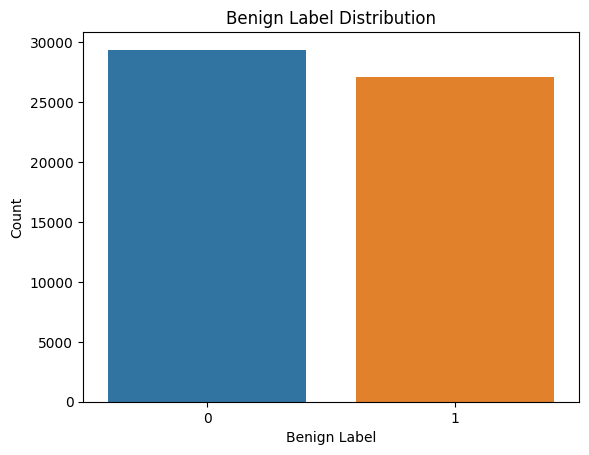

In [8]:
sns.countplot(x=df['Benign'], data=df)
plt.title('Benign Label Distribution')
plt.xlabel('Benign Label')
plt.ylabel('Count')
plt.show()

In [9]:
X = df.iloc[:,:-1]
y = df['Benign']

In [10]:
#some times cause use model out of memory errors
classify_models=lazypredict.Supervised.CLASSIFIERS
classify_models=classify_models[:11]+classify_models[15:]

# Train model

In [11]:

# Scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LazyClassifier(verbose=1,predictions=True,classifiers=classify_models ,custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  4%|▍         | 1/25 [00:01<00:41,  1.73s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9821786852354538, 'Balanced Accuracy': 0.9821433407634398, 'ROC AUC': 0.9821433407634399, 'F1 Score': 0.9821785979547232, 'Time taken': 1.7315118312835693}


  8%|▊         | 2/25 [00:02<00:30,  1.32s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9958102207010504, 'Balanced Accuracy': 0.9957517821211667, 'ROC AUC': 0.9957517821211668, 'F1 Score': 0.9958099993925009, 'Time taken': 1.0234405994415283}
{'Model': 'BernoulliNB', 'Accuracy': 0.854892009913844, 'Balanced Accuracy': 0.850715172337071, 'ROC AUC': 0.8507151723370708, 'F1 Score': 0.852979182849652, 'Time taken': 0.08261990547180176}


 16%|█▌        | 4/25 [00:28<03:02,  8.71s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.8141154254691373, 'Balanced Accuracy': 0.8067067946273009, 'ROC AUC': 0.8067067946273009, 'F1 Score': 0.807019778766526, 'Time taken': 26.1476411819458}


 32%|███▏      | 8/25 [00:29<00:47,  2.81s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9943349463000118, 'Balanced Accuracy': 0.9943203798104204, 'ROC AUC': 0.9943203798104204, 'F1 Score': 0.994334918555144, 'Time taken': 0.20243287086486816}
{'Model': 'DummyClassifier', 'Accuracy': 0.5206538416145403, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3565314016504396, 'Time taken': 0.06007742881774902}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9930957158031394, 'Balanced Accuracy': 0.9931107742208305, 'ROC AUC': 0.9931107742208305, 'F1 Score': 0.99309589832492, 'Time taken': 0.08024382591247559}


 36%|███▌      | 9/25 [00:31<00:43,  2.71s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9963413194854243, 'Balanced Accuracy': 0.9963301823715727, 'ROC AUC': 0.9963301823715726, 'F1 Score': 0.9963413015668636, 'Time taken': 2.363079309463501}
{'Model': 'GaussianNB', 'Accuracy': 0.5317479051103505, 'Balanced Accuracy': 0.5502448826399402, 'ROC AUC': 0.5502448826399402, 'F1 Score': 0.41845746298258085, 'Time taken': 0.08719587326049805}


 48%|████▊     | 12/25 [00:35<00:24,  1.89s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9909713206656439, 'Balanced Accuracy': 0.9909241454236937, 'ROC AUC': 0.9909241454236936, 'F1 Score': 0.9909710287265769, 'Time taken': 3.559380054473877}
{'Model': 'LogisticRegression', 'Accuracy': 0.9032219992918683, 'Balanced Accuracy': 0.9026658986383124, 'ROC AUC': 0.9026658986383124, 'F1 Score': 0.9031755070330872, 'Time taken': 0.18770456314086914}
{'Model': 'NearestCentroid', 'Accuracy': 0.8029623509972855, 'Balanced Accuracy': 0.7963135824999596, 'ROC AUC': 0.7963135824999596, 'F1 Score': 0.7969083108466358, 'Time taken': 0.07660865783691406}


 60%|██████    | 15/25 [02:47<03:28, 20.82s/it]

{'Model': 'NuSVC', 'Accuracy': 0.8343561902513867, 'Balanced Accuracy': 0.8298903075963047, 'ROC AUC': 0.8298903075963046, 'F1 Score': 0.8319225762124389, 'Time taken': 131.91446042060852}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.8751917856721351, 'Balanced Accuracy': 0.8749320646382285, 'ROC AUC': 0.8749320646382285, 'F1 Score': 0.875185837633469, 'Time taken': 0.16536259651184082}


 68%|██████▊   | 17/25 [02:47<01:35, 11.98s/it]

{'Model': 'Perceptron', 'Accuracy': 0.8591998111648766, 'Balanced Accuracy': 0.8559264674104419, 'ROC AUC': 0.855926467410442, 'F1 Score': 0.858001468480008, 'Time taken': 0.14360952377319336}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.5439631771509501, 'Balanced Accuracy': 0.5619414016578859, 'ROC AUC': 0.5619414016578859, 'F1 Score': 0.44137107240364687, 'Time taken': 0.11704421043395996}


 76%|███████▌  | 19/25 [02:51<00:41,  6.99s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9966953853416736, 'Balanced Accuracy': 0.996650668587491, 'ROC AUC': 0.996650668587491, 'F1 Score': 0.996695253274334, 'Time taken': 2.945007562637329}
{'Model': 'RidgeClassifier', 'Accuracy': 0.8491679452378142, 'Balanced Accuracy': 0.8443293704192074, 'ROC AUC': 0.8443293704192073, 'F1 Score': 0.8465696334501303, 'Time taken': 0.10514688491821289}


 80%|████████  | 20/25 [02:51<00:25,  5.06s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.8491679452378142, 'Balanced Accuracy': 0.8443293704192074, 'ROC AUC': 0.8443293704192073, 'F1 Score': 0.8465696334501303, 'Time taken': 0.12012982368469238}


 84%|████████▍ | 21/25 [02:51<00:14,  3.67s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.8802077186356663, 'Balanced Accuracy': 0.8811457145715911, 'ROC AUC': 0.8811457145715911, 'F1 Score': 0.8802530198326641, 'Time taken': 0.21123957633972168}


 88%|████████▊ | 22/25 [03:14<00:28,  9.35s/it]

{'Model': 'SVC', 'Accuracy': 0.9635902277823675, 'Balanced Accuracy': 0.9630762666638983, 'ROC AUC': 0.9630762666638983, 'F1 Score': 0.963569412386297, 'Time taken': 23.20560622215271}


 96%|█████████▌| 24/25 [03:15<00:05,  5.21s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9957512097250089, 'Balanced Accuracy': 0.9956902285079696, 'ROC AUC': 0.9956902285079695, 'F1 Score': 0.9957509742852281, 'Time taken': 0.4317662715911865}
[LightGBM] [Info] Number of positive: 18995, number of negative: 20544
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1554
[LightGBM] [Info] Number of data points in the train set: 39539, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480412 -> initscore=-0.078393
[LightGBM] [Info] Start training from score -0.078393


100%|██████████| 25/25 [03:15<00:00,  7.82s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9956331877729258, 'Balanced Accuracy': 0.9955622377352489, 'ROC AUC': 0.9955622377352489, 'F1 Score': 0.9956329002066628, 'Time taken': 0.5623822212219238}


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,1.00,1.00,2.95
ExtraTreesClassifier,1.00,1.00,1.00,1.00,2.36
BaggingClassifier,1.00,1.00,1.00,1.00,1.02
XGBClassifier,1.00,1.00,1.00,1.00,0.43
LGBMClassifier,1.00,1.00,1.00,1.00,0.56
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.20
ExtraTreeClassifier,0.99,0.99,0.99,0.99,0.08
KNeighborsClassifier,0.99,0.99,0.99,0.99,3.56
AdaBoostClassifier,0.98,0.98,0.98,0.98,1.73


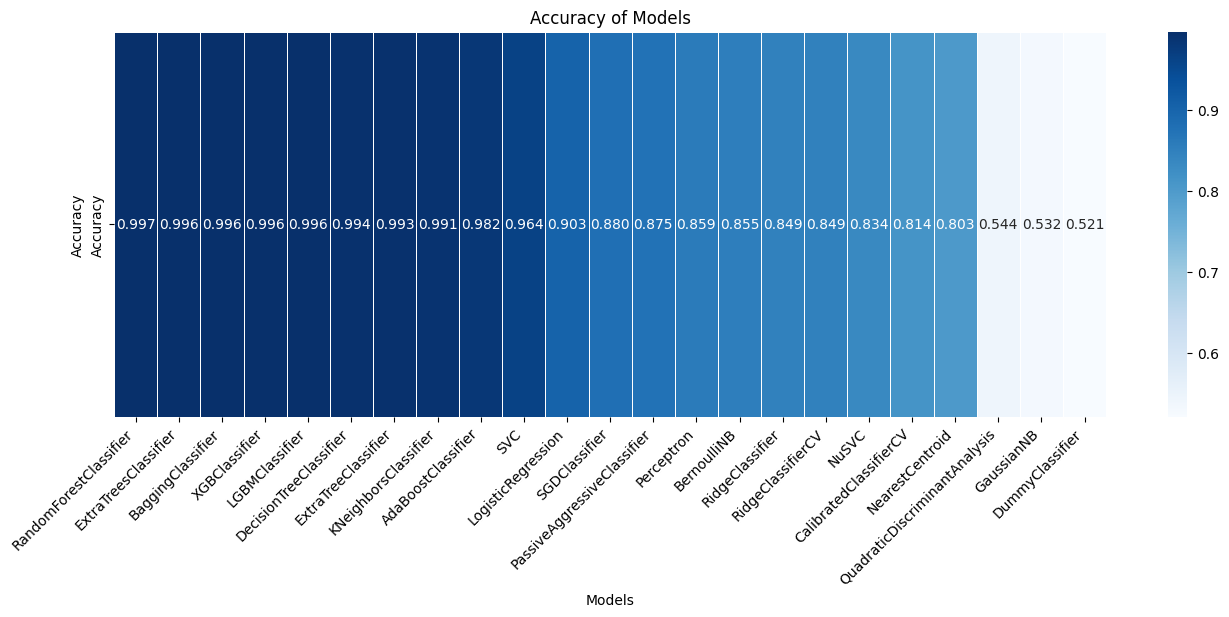

In [12]:
accuracy_matrix = models[['Accuracy']].sort_values(by='Accuracy', ascending=False)

# Plot heatmap for accuracy
plt.figure(figsize=(16, 5))
sns.heatmap(accuracy_matrix.T, annot=True, cmap="Blues", fmt=".3f", linewidths=0.5)
plt.title("Accuracy of Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.show()

# Confusion Matrix 

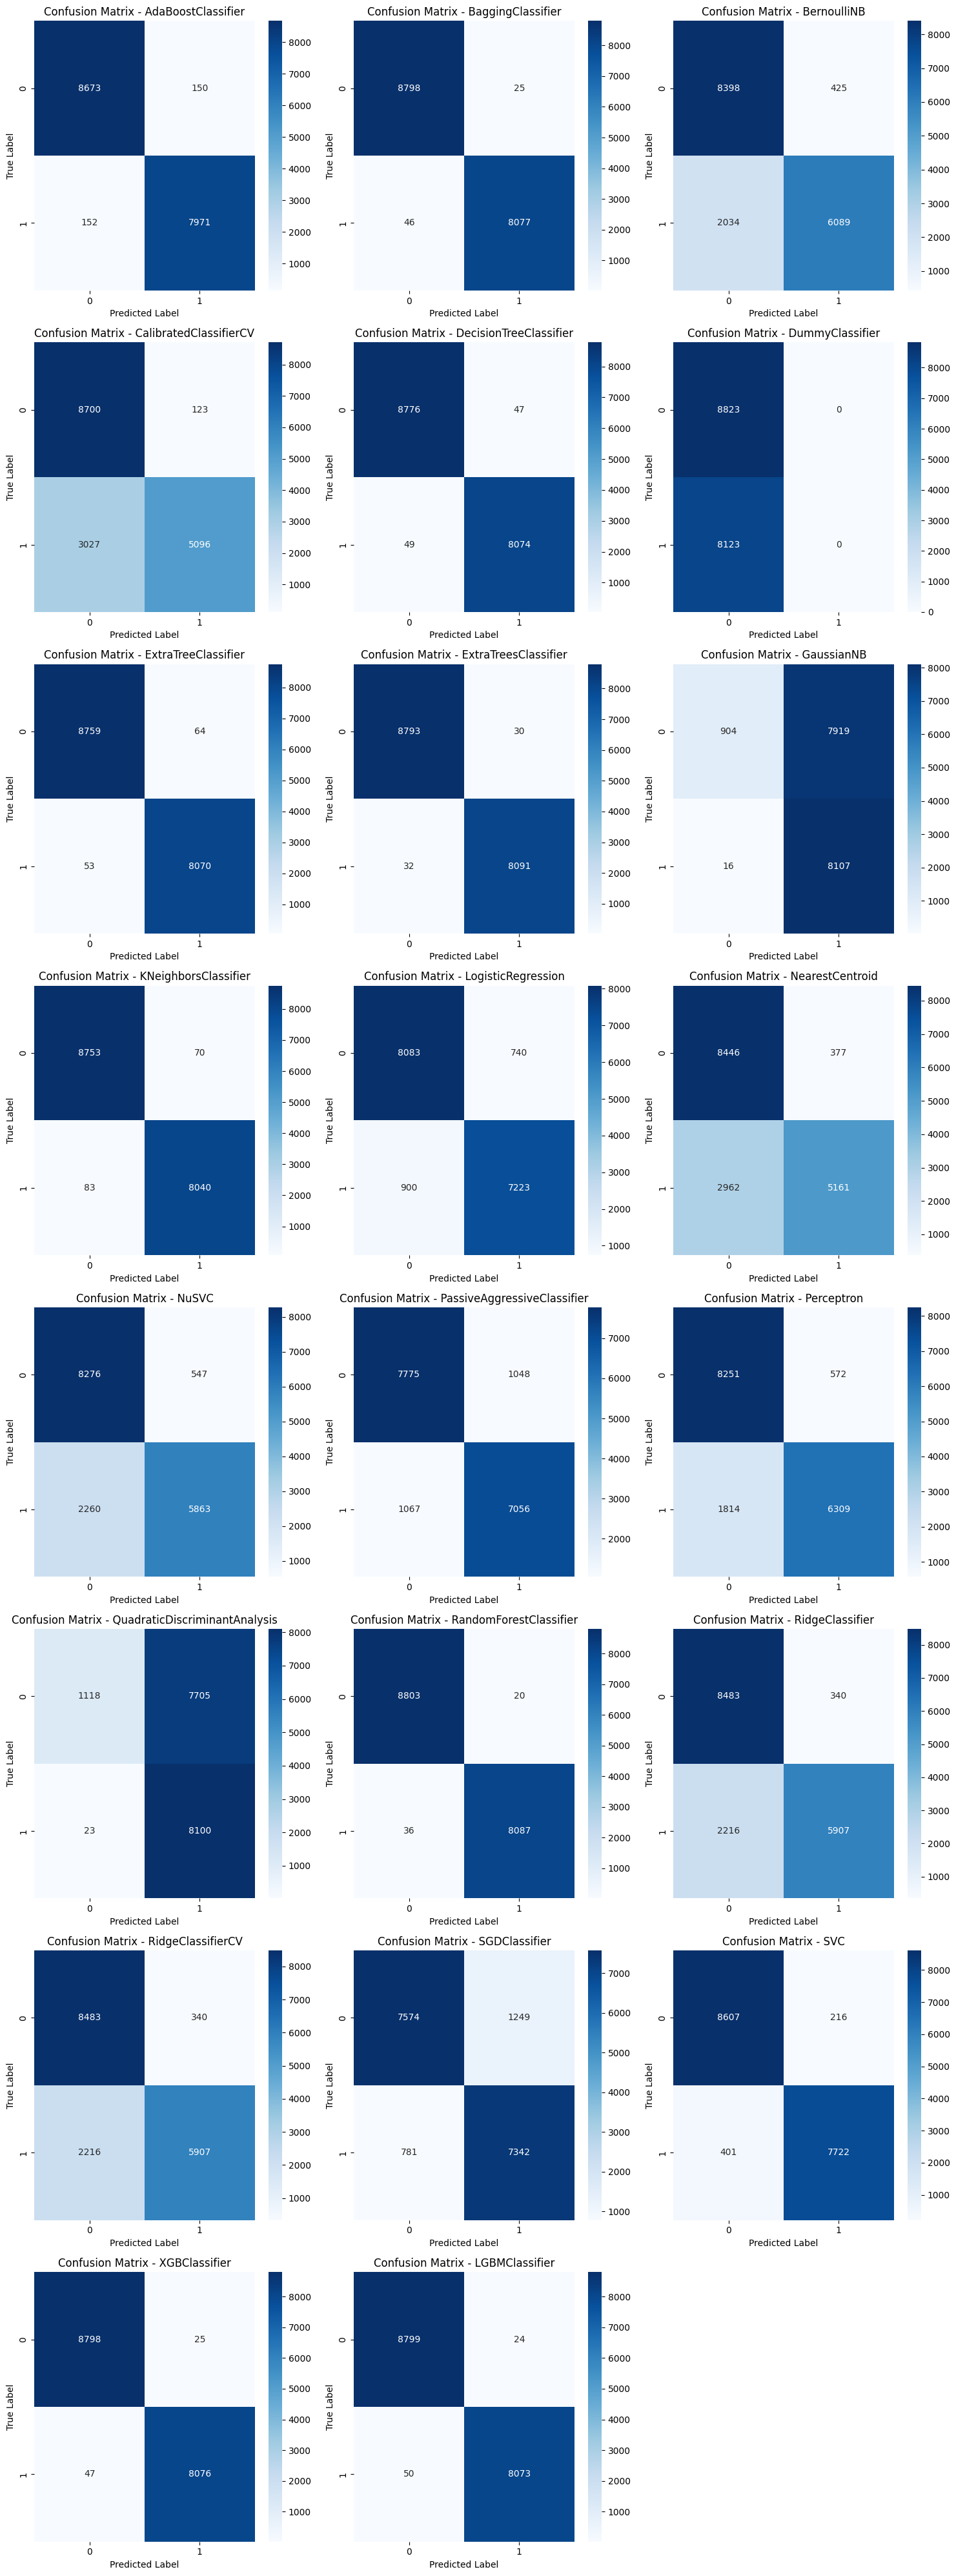

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the number of models
num_models = len(predictions.columns)

# Set up the subplot grid (adjust columns & rows for better visibility)
cols = min(3, num_models)  # Max 3 columns per row
rows = (num_models // cols) + (num_models % cols > 0)  # Calculate needed rows

# Create a single figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each model and plot its confusion matrix
for i, model_name in enumerate(predictions.columns):
    y_pred = predictions[model_name]  # Get predictions for the current model
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix on the respective subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# AUC Curve

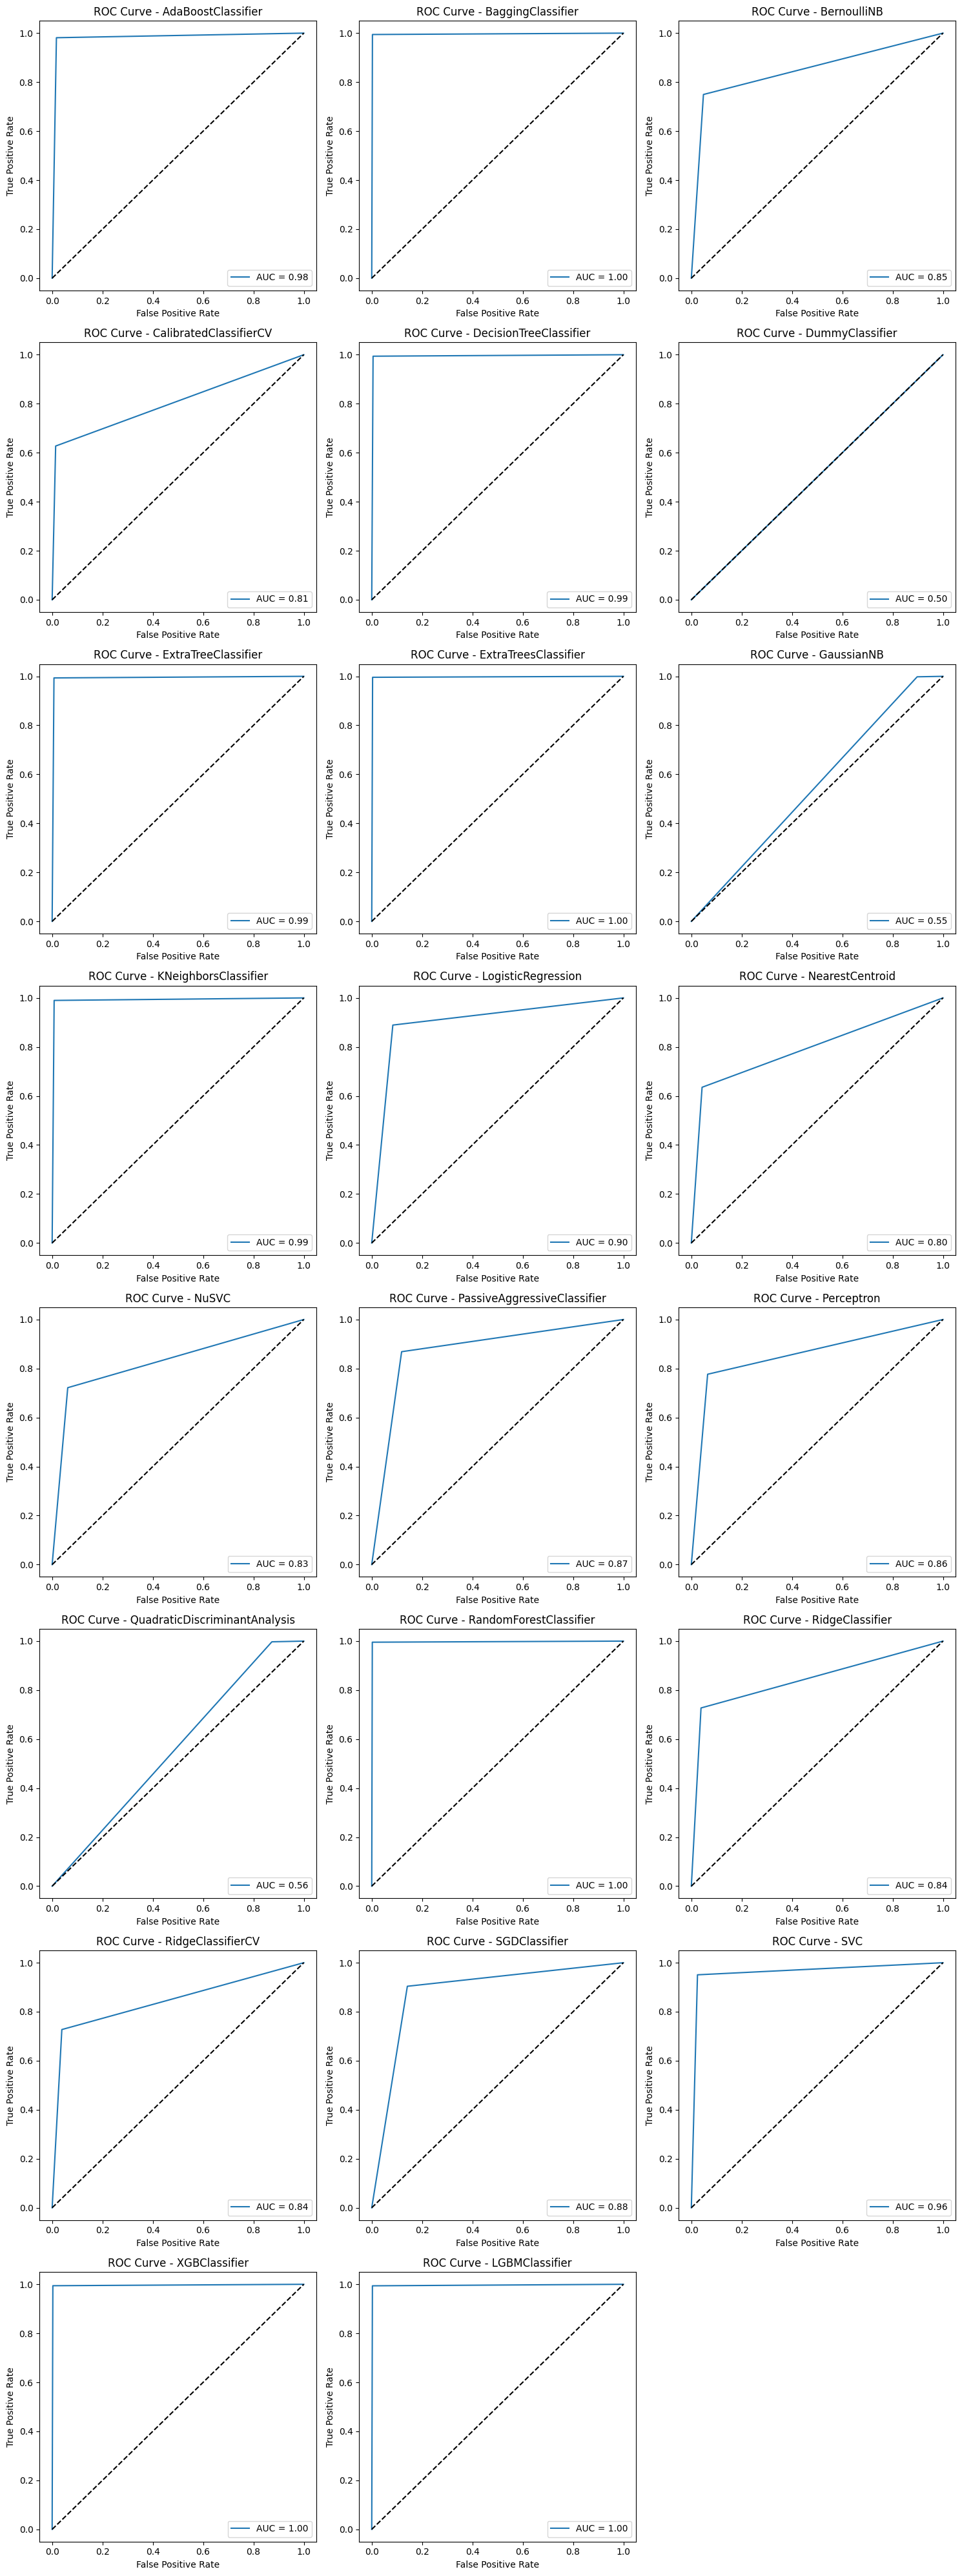

In [14]:
num_models = len(predictions.columns)

# Set up the subplot grid for AUC curves (3 columns for better visibility)
cols = 3
rows = (num_models // cols) + (num_models % cols > 0)  # Calculate needed rows

# Create a single figure with subplots for AUC curves
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))  # Adjust figure size
axes = axes.flatten()  # Flatten for easy iteration

# Loop through each model and plot its AUC curve
for i, model_name in enumerate(predictions.columns):
    y_pred = predictions[model_name]  # Get predictions for the current model
    
    # Calculate ROC AUC score
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Plot ROC curve
    axes[i].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    axes[i].plot([0, 1], [0, 1], 'k--')  # Diagonal line
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {model_name}')
    axes[i].legend(loc='lower right')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()